Problem: What are the most important features that influence the success rate of the campaign?

In [1]:
# !pip install seaborn --upgrade
# !pip install plotly==5.4.0

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings
import re
import os
from datetime import date

import plotly.express as px
sns.set()
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
warnings.filterwarnings("ignore")

sns.__version__

'0.11.2'

In [13]:
import sklearn
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [3]:
# Matplotlib visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 12

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 0.5)

# Splitting data into training and testing
from sklearn.model_selection import train_test_split

import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [4]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
import collections
# check version number
import imblearn

print(imblearn.__version__)

0.8.1


In [5]:
data = pd.read_csv('C:\\Users\\DKici\\Documents\\PricingPromo\\data\\pricing_promo_2019_2021_all.csv')
data = data.drop(columns = "Unnamed: 0")
data.head(2)

,Date,Amount of Employee pricing % off,off Particular Item?,Amount of % Off Particular Item,Location Specific?,off 1st item?,Amount of % off 1st item,off conditional?,Amount of $ off conditional,Amount of % off conditional,off HomeStore Specials?,Amount of % Off Homestore Specials,"Amount of % off Reg Price Living, Dining, amd M. Bedroom","% off reg. price living, dining, and m. bedroom?",off rest of purchase?,Amount of % off rest of purchase,off sectionals?,Amount % off sectionals,amount of % off sofa w/ full price loveseat,sofa w full-price loveseat?,Amount of % Accessories,Add. % off CLA?,Amount of % Off CLA,off JUV?,Amount of % Off JUV,off OTB (occasional tables)?,Amount of % Off OTB(occasional tables),Financing?,Amount of % When Financing,Amount of % With Rest Test,Amount % Off at 090,Amount % off in AB,Amount % off in GTA,Amount % off in MB,Amount % Savings over $2499,Amount of % Savings for $1499 or more,Amount of % Savings over $2000,Black Friday?,BMSM?,Canada Day,Clearance (CLA),Doorcrashers,Easter Weekend,First Item?,Flash,Flash Items Only,Family Spaces,off reg priced furniture?,Amount of off reg priced furniture,High Impact,Item and Price (I&P),Matress Deal,Flyer continues,No flyer items,No Flyers,No promo items,Online Only,OR,Percent Amount,Percent discount?,simple event,Prospect Event,Red Tag Sale,Rest Test,Separate item selections,Amount of x GST Savings,Amount x Tax Savings,Tax,Week 1,Week 2,Week 3,Week 4,Week 5,Wrap,$X off with $Y,X% on orders over $Y,$X off over $Y,weekday,day,month,Ontario_C1_School closing_1.0,Ontario_C1_School closing_2.0,Ontario_C1_School closing_3.0,Ontario_C2_Workplace closing_1.0,Ontario_C2_Workplace closing_2.0,Ontario_C2_Workplace closing_3.0,Ontario_C6_Stay at home requirements_1.0,Ontario_C6_Stay at home requirements_2.0,Manitoba_C1_School closing_1.0,Manitoba_C1_School closing_2.0,Manitoba_C2_Workplace closing_1.0,Manitoba_C2_Workplace closing_2.0,Manitoba_C2_Workplace closing_3.0,Manitoba_C6_Stay at home requirements_1.0,Manitoba_C6_Stay at home requirements_2.0,Saskatchewan_C1_School closing_2.0,Saskatchewan_C1_School closing_3.0,Saskatchewan_C2_Workplace closing_1.0,Saskatchewan_C2_Workplace closing_2.0,Saskatchewan_C2_Workplace closing_3.0,Saskatchewan_C6_Stay at home requirements_1.0,WrittenSales,Margin,Traffic,FinancedAmount
0,2019-03-01,0,0,0,0,0,0,1,0,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,267388.65,114438.41,67997.5,3804921.27
1,2019-03-02,0,0,0,0,0,0,1,0,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,668799.75,302135.49,134966.5,5347859.81


In [6]:
print('Number of records :',data.shape[0])
print('Number of features :',data.shape[1])

Number of records : 1037
Number of features : 105


In [7]:
data.set_index(data["Date"], inplace = True)
data = data.drop("Date", axis = 1)
data.head()

,Amount of Employee pricing % off,off Particular Item?,Amount of % Off Particular Item,Location Specific?,off 1st item?,Amount of % off 1st item,off conditional?,Amount of $ off conditional,Amount of % off conditional,off HomeStore Specials?,Amount of % Off Homestore Specials,"Amount of % off Reg Price Living, Dining, amd M. Bedroom","% off reg. price living, dining, and m. bedroom?",off rest of purchase?,Amount of % off rest of purchase,off sectionals?,Amount % off sectionals,amount of % off sofa w/ full price loveseat,sofa w full-price loveseat?,Amount of % Accessories,Add. % off CLA?,Amount of % Off CLA,off JUV?,Amount of % Off JUV,off OTB (occasional tables)?,Amount of % Off OTB(occasional tables),Financing?,Amount of % When Financing,Amount of % With Rest Test,Amount % Off at 090,Amount % off in AB,Amount % off in GTA,Amount % off in MB,Amount % Savings over $2499,Amount of % Savings for $1499 or more,Amount of % Savings over $2000,Black Friday?,BMSM?,Canada Day,Clearance (CLA),Doorcrashers,Easter Weekend,First Item?,Flash,Flash Items Only,Family Spaces,off reg priced furniture?,Amount of off reg priced furniture,High Impact,Item and Price (I&P),Matress Deal,Flyer continues,No flyer items,No Flyers,No promo items,Online Only,OR,Percent Amount,Percent discount?,simple event,Prospect Event,Red Tag Sale,Rest Test,Separate item selections,Amount of x GST Savings,Amount x Tax Savings,Tax,Week 1,Week 2,Week 3,Week 4,Week 5,Wrap,$X off with $Y,X% on orders over $Y,$X off over $Y,weekday,day,month,Ontario_C1_School closing_1.0,Ontario_C1_School closing_2.0,Ontario_C1_School closing_3.0,Ontario_C2_Workplace closing_1.0,Ontario_C2_Workplace closing_2.0,Ontario_C2_Workplace closing_3.0,Ontario_C6_Stay at home requirements_1.0,Ontario_C6_Stay at home requirements_2.0,Manitoba_C1_School closing_1.0,Manitoba_C1_School closing_2.0,Manitoba_C2_Workplace closing_1.0,Manitoba_C2_Workplace closing_2.0,Manitoba_C2_Workplace closing_3.0,Manitoba_C6_Stay at home requirements_1.0,Manitoba_C6_Stay at home requirements_2.0,Saskatchewan_C1_School closing_2.0,Saskatchewan_C1_School closing_3.0,Saskatchewan_C2_Workplace closing_1.0,Saskatchewan_C2_Workplace closing_2.0,Saskatchewan_C2_Workplace closing_3.0,Saskatchewan_C6_Stay at home requirements_1.0,WrittenSales,Margin,Traffic,FinancedAmount
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-03-01,0,0,0,0,0,0,1,0,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,267388.65,114438.41,67997.5,3804921.27
2019-03-02,0,0,0,0,0,0,1,0,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,668799.75,302135.49,134966.5,5347859.81
2019-03-03,0,0,0,0,0,0,1,0,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,20,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,671177.75,299434.47,125703.0,5193938.29
2019-03-04,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,265077.82,123662.13,58639.5,1842761.07
2019-03-05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,161678.91,64793.74,45278.5,3814992.83


In [8]:
# data = data.drop(columns = data.columns[80:-4], axis = 1)
# data.head()

## 1) Null values

In [9]:
pd.DataFrame(data.isnull().sum(), columns=['#Null values']).T

,Amount of Employee pricing % off,off Particular Item?,Amount of % Off Particular Item,Location Specific?,off 1st item?,Amount of % off 1st item,off conditional?,Amount of $ off conditional,Amount of % off conditional,off HomeStore Specials?,Amount of % Off Homestore Specials,"Amount of % off Reg Price Living, Dining, amd M. Bedroom","% off reg. price living, dining, and m. bedroom?",off rest of purchase?,Amount of % off rest of purchase,off sectionals?,Amount % off sectionals,amount of % off sofa w/ full price loveseat,sofa w full-price loveseat?,Amount of % Accessories,Add. % off CLA?,Amount of % Off CLA,off JUV?,Amount of % Off JUV,off OTB (occasional tables)?,Amount of % Off OTB(occasional tables),Financing?,Amount of % When Financing,Amount of % With Rest Test,Amount % Off at 090,Amount % off in AB,Amount % off in GTA,Amount % off in MB,Amount % Savings over $2499,Amount of % Savings for $1499 or more,Amount of % Savings over $2000,Black Friday?,BMSM?,Canada Day,Clearance (CLA),Doorcrashers,Easter Weekend,First Item?,Flash,Flash Items Only,Family Spaces,off reg priced furniture?,Amount of off reg priced furniture,High Impact,Item and Price (I&P),Matress Deal,Flyer continues,No flyer items,No Flyers,No promo items,Online Only,OR,Percent Amount,Percent discount?,simple event,Prospect Event,Red Tag Sale,Rest Test,Separate item selections,Amount of x GST Savings,Amount x Tax Savings,Tax,Week 1,Week 2,Week 3,Week 4,Week 5,Wrap,$X off with $Y,X% on orders over $Y,$X off over $Y,weekday,day,month,Ontario_C1_School closing_1.0,Ontario_C1_School closing_2.0,Ontario_C1_School closing_3.0,Ontario_C2_Workplace closing_1.0,Ontario_C2_Workplace closing_2.0,Ontario_C2_Workplace closing_3.0,Ontario_C6_Stay at home requirements_1.0,Ontario_C6_Stay at home requirements_2.0,Manitoba_C1_School closing_1.0,Manitoba_C1_School closing_2.0,Manitoba_C2_Workplace closing_1.0,Manitoba_C2_Workplace closing_2.0,Manitoba_C2_Workplace closing_3.0,Manitoba_C6_Stay at home requirements_1.0,Manitoba_C6_Stay at home requirements_2.0,Saskatchewan_C1_School closing_2.0,Saskatchewan_C1_School closing_3.0,Saskatchewan_C2_Workplace closing_1.0,Saskatchewan_C2_Workplace closing_2.0,Saskatchewan_C2_Workplace closing_3.0,Saskatchewan_C6_Stay at home requirements_1.0,WrittenSales,Margin,Traffic,FinancedAmount
#Null values,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
# take a look to see how is the situation of missing data:
missing_data = pd.DataFrame({'total_missing': data.isnull().sum(), 'perc_missing': (data.isnull().sum()/len(data))*100}).round(2)

# Print some summary information
print ("Our dataframe has " + str(data.shape[1]) + " column(s).\n"
        "There is/are " + str(len(missing_data.loc[missing_data['total_missing'] > 0])) +
              " column(s) that has/have missing values.")
missing_data

Our dataframe has 104 column(s).
There is/are 0 column(s) that has/have missing values.


,total_missing,perc_missing
Amount of Employee pricing % off,0,0.0
off Particular Item?,0,0.0
Amount of % Off Particular Item,0,0.0
Location Specific?,0,0.0
off 1st item?,0,0.0
...,...,...
Saskatchewan_C6_Stay at home requirements_1.0,0,0.0
WrittenSales,0,0.0
Margin,0,0.0
Traffic,0,0.0


In [11]:
data.columns

Index(['Amount of Employee pricing % off', 'off Particular Item?',
       'Amount of % Off Particular Item', 'Location Specific?',
       'off 1st item?', 'Amount of % off 1st item', 'off conditional?',
       'Amount of $ off conditional', 'Amount of % off conditional',
       'off HomeStore Specials?',
       ...
       'Saskatchewan_C1_School closing_2.0',
       'Saskatchewan_C1_School closing_3.0',
       'Saskatchewan_C2_Workplace closing_1.0',
       'Saskatchewan_C2_Workplace closing_2.0',
       'Saskatchewan_C2_Workplace closing_3.0',
       'Saskatchewan_C6_Stay at home requirements_1.0', 'WrittenSales',
       'Margin', 'Traffic', 'FinancedAmount'],
      dtype='object', length=104)

### Continous Features

In [12]:
df_amount= data[[ 
'WrittenSales',
'month',
'weekday',
'day',
'Amount of % Off Particular Item', 
'Amount of % off 1st item', 
'Amount of $ off conditional', 
'Amount of % off conditional',
'Amount of % Off Homestore Specials ',
'Amount of % off Reg Price Living, Dining, amd M. Bedroom ',
'Amount of % off rest of purchase ',
'Amount % off sectionals ',
'amount of % off sofa w/ full price loveseat ',
'Amount of % Accessories',
'Amount of % Off CLA ', 
'Amount of % Off JUV ',
'Amount of % Off OTB(occasional tables)', 
'Amount of % When Financing ', 
'Amount of % With Rest Test ',
'Amount % Off at 090', 
'Amount % off in AB', 
'Amount % off in GTA',
'Amount % off in MB', 
'Amount % Savings over $2499',
'Amount of %  Savings for $1499 or more',
'Amount of % Savings over $2000',  
'Amount of off reg priced furniture',
' Percent  Amount',  
'Amount of x GST Savings ',
'Amount x Tax Savings']]

# Decision Tree Regression 

The decision tree is a simple machine learning model for getting started with regression tasks.

Background A decision tree is a flow-chart-like structure, where each internal (non-leaf) node denotes a test on an attribute, each branch represents the outcome of a test, and each leaf (or terminal) node holds a class label. The topmost node in a tree is the root node. (see here for more details).

In [14]:
X = data.iloc[:, 1:-4].values
y = data["WrittenSales"].values.reshape(-1,1)

X_df = data.iloc[:, 1:-4]

# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=100)

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1,len(X_df.columns)))}]

In [24]:
from sklearn.tree import DecisionTreeRegressor

dtreg = DecisionTreeRegressor(random_state = 100)
dtreg.fit(X_train, y_train)

prediction = dtreg.predict(X_test)
print(" {} nn score: {} ".format(3,dtreg.score(X_test,y_test)))


 3 nn score: 0.1272264793580773 


In [25]:
rfe = RFE(dtreg)

model_cv = GridSearchCV(estimator=rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,
                        n_jobs=-1)


In [26]:
dtreg.get_params().keys()

dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [27]:
# fit the model
model_cv.fit(X_train, y_train)                  

cv_results = pd.DataFrame(model_cv.cv_results_)
# print(cv_results)

Fitting 5 folds for each of 98 candidates, totalling 490 fits


In [28]:
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.434237,0.016212,0.000997,4.672031e-07,1,{'n_features_to_select': 1},-0.095365,0.137706,-0.087436,-0.035405,0.263242,0.036548,0.141119,95,0.063185,0.248883,0.063819,0.049794,0.209684,0.127073,0.084519
1,0.433440,0.013285,0.000399,4.887531e-04,2,{'n_features_to_select': 2},-0.072820,0.161056,-0.246756,-0.034710,0.333279,0.028010,0.200244,96,0.603377,0.461306,0.644198,0.565557,0.404981,0.535884,0.089292
2,0.439863,0.016465,0.000199,3.985405e-04,3,{'n_features_to_select': 3},0.110612,-0.474480,-0.037175,-0.006415,-0.010535,-0.083599,0.201969,98,0.773260,0.831080,0.802246,0.728826,0.723518,0.771786,0.041524
3,0.432291,0.019963,0.000998,3.371748e-07,4,{'n_features_to_select': 4},0.098320,-0.232492,0.013102,0.125454,0.092484,0.019374,0.131382,97,0.773260,0.831080,0.802246,0.728826,0.723518,0.771786,0.041524
4,0.433669,0.011697,0.000798,3.990413e-04,5,{'n_features_to_select': 5},0.299114,-0.063653,0.174402,0.159167,0.198698,0.153546,0.119055,94,0.773260,0.831080,0.802246,0.728826,0.723518,0.771786,0.041524
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,0.039494,0.003763,0.001397,4.884831e-04,94,{'n_features_to_select': 94},0.487722,0.388686,0.427209,0.286775,0.538851,0.425849,0.086397,29,0.773260,0.831080,0.802246,0.728826,0.723518,0.771786,0.041524
94,0.031912,0.002274,0.000599,4.890064e-04,95,{'n_features_to_select': 95},0.490806,0.379391,0.441730,0.276670,0.552046,0.428129,0.094640,21,0.773260,0.831080,0.802246,0.728826,0.723518,0.771786,0.041524
95,0.026130,0.002130,0.000997,6.307522e-04,96,{'n_features_to_select': 96},0.488295,0.381958,0.441687,0.283242,0.537388,0.426514,0.088150,26,0.773260,0.831080,0.802246,0.728826,0.723518,0.771786,0.041524
96,0.016953,0.001093,0.000798,3.988983e-04,97,{'n_features_to_select': 97},0.497246,0.317976,0.425043,0.265513,0.532286,0.407613,0.102087,83,0.773260,0.831080,0.802246,0.728826,0.723518,0.771786,0.041524


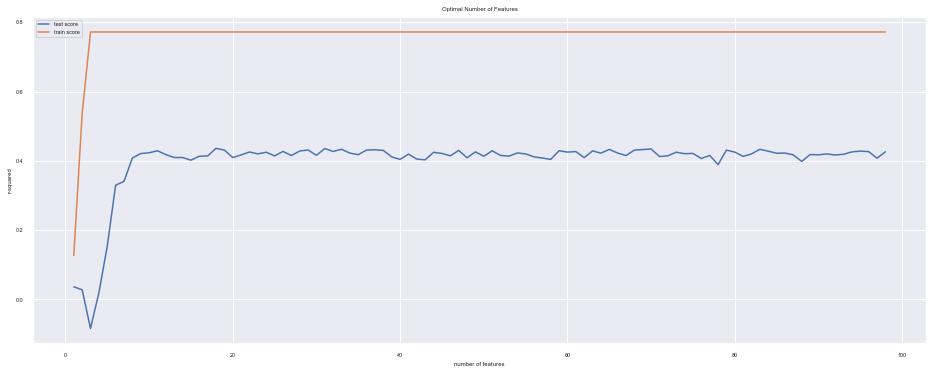

In [29]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [30]:
n_features_optimal = cv_results["param_n_features_to_select"][cv_results["mean_test_score"] == cv_results["mean_test_score"].max()].values
n_features_optimal

array([18], dtype=object)

In [31]:
cv_results["mean_test_score"].max(), cv_results["mean_train_score"].max()

(0.43604568402271937, 0.7717859694719132)

In [32]:
rfe = RFE(dtreg, n_features_to_select=int(n_features_optimal))             
rfe = rfe.fit(X_train, y_train)

# predict prices of X_test
y_pred = rfe.predict(X_test)

r2 = sklearn.metrics.r2_score(y_test, y_pred)
mae = sklearn.metrics.mean_absolute_error(y_test,s y_pred)
mse = sklearn.metrics.mean_squared_error(y_test, y_pred)

print("R_square_score for Written Sales GridSearchCV RFE:", r2)
print("MAE for Written Sales GridSearchCV RFE:", mae)
print("MSE for Written Sales GridSearchCV RFE:", mse)
print("RMSE for Written Sales GridSearchCV RFE:", np.sqrt(mse))


R_square_score for Written Sales GridSearchCV RFE: 0.09396922254391293
MAE for Written Sales GridSearchCV RFE: 220301.27460237124
MSE for Written Sales GridSearchCV RFE: 165816770275.7985
RMSE for Written Sales GridSearchCV RFE: 407206.0538299971


In [33]:
y_pred= y_pred.reshape(-1,1)

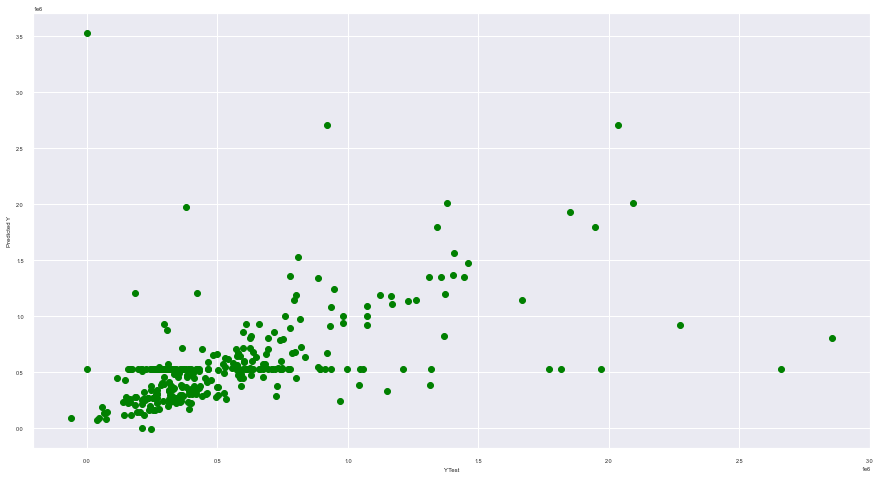

In [34]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,y_pred,c='green')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

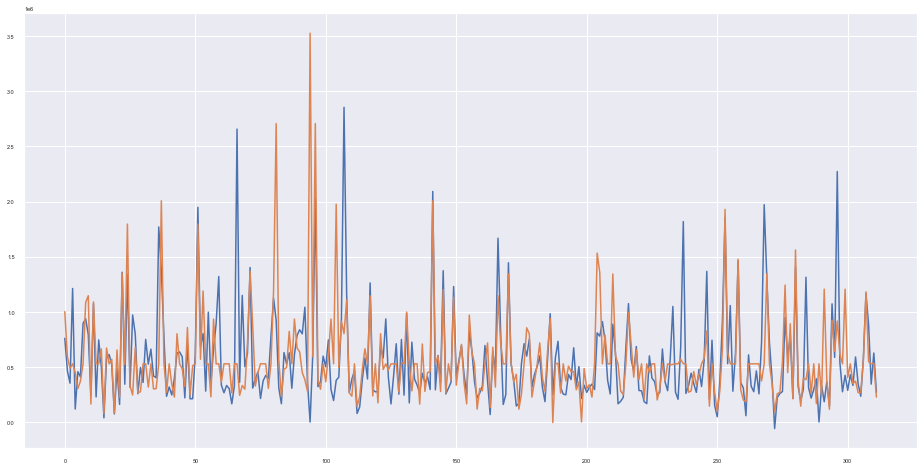

In [35]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test')
plt.plot(y_pred, label = 'predict')
plt.show()